# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('previsao_de_renda.csv')
df = df.drop(columns=['Unnamed: 0','mau','index'])
df.dtypes


data_ref                  object
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [ ]:
sns.pairplot(df,hue='sexo')

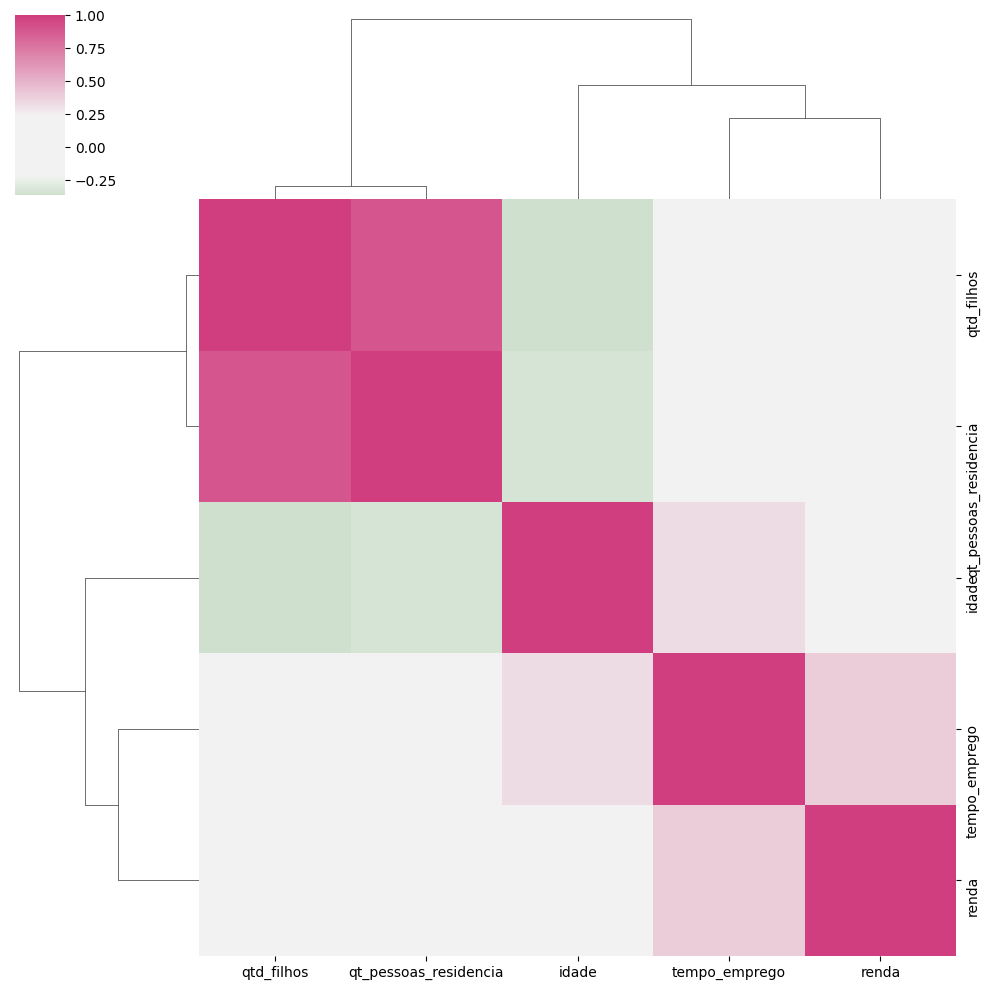

In [10]:
df2 = df.select_dtypes(exclude=['object','bool'])
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df2.corr(),figsize=(10,10),center=0,cmap=cmap)

### Podemos observar claramente que o tempo de emprego tem uma influência significativa na renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

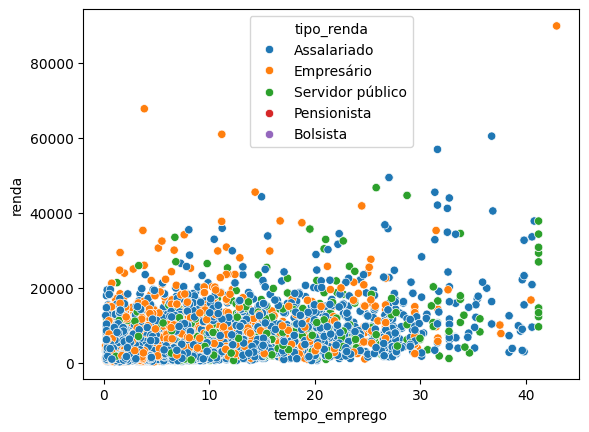

In [4]:
sns.scatterplot(x='tempo_emprego', y='renda',hue='tipo_renda',data=df)

3) Na su aopinião, há outliers na variável renda?

In [5]:
df['renda'].describe()

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

### Sim, tem um outliers('89918.040000'), muito acima da média. 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [6]:
df_log = df.copy()
df_log['renda_log'] = np.log(df_log['renda'])
df_log

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24,8.122442
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14,8.715411
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98,8.640999
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69,8.888300
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37,8.298383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29,7.084469
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18,7.831689
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85,7.369506
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39,8.850144


<Axes: xlabel='tempo_emprego', ylabel='renda_log'>

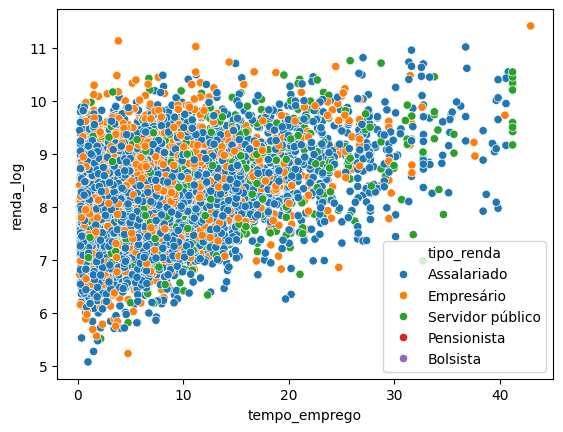

In [7]:
sns.scatterplot(x='tempo_emprego', y='renda_log',hue='tipo_renda', data=df_log)

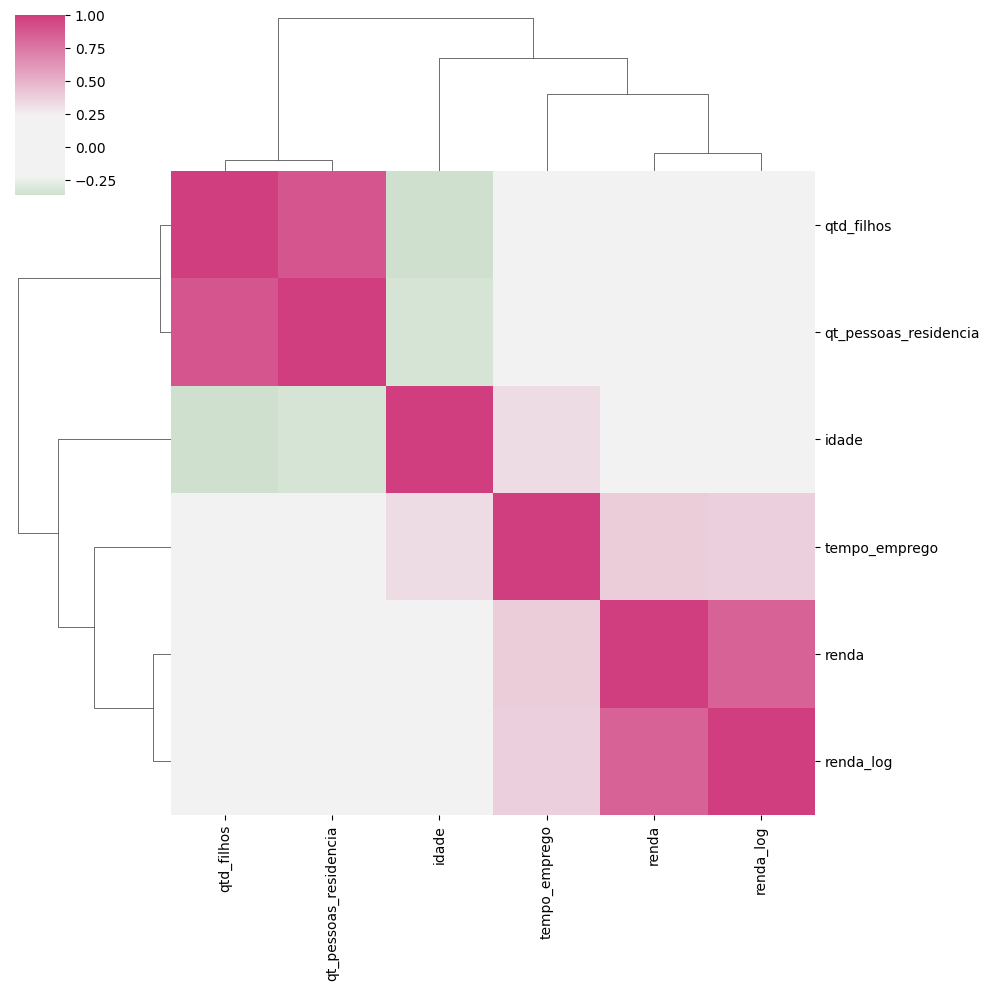

In [8]:
df_log = df_log.select_dtypes(exclude=['object','bool'])
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df_log.corr(),figsize=(10,10),center=0,cmap=cmap)

In [9]:
df_log['renda_log'].describe()

count    15000.000000
mean         8.111047
std          0.797451
min          5.074549
25%          7.573398
50%          8.095068
75%          8.638059
max         11.406654
Name: renda_log, dtype: float64

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### As melhorias são evidentes, agora consigo entender os dados com mais facilidade. No entanto, ao observar o clustermap, não percebi muitas diferenças significativas.